In [10]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
IMAGES_DIR = "./images/"
LABEL_FILE = "./labels.csv"

In [4]:
image_files = glob.glob(os.path.join(IMAGES_DIR, '*'))
n_images = len(image_files)
print(n_images, "image files")

15115 image files


In [5]:
with open(LABEL_FILE, 'r') as f:
    lines = f.readlines()
lines = list(map(lambda s:s.strip(), lines))

In [6]:
lines

['0000001.jpeg,ink,inktober',
 '0000002.jpeg,ink,day,inktober',
 '0000003.jpeg,ink,inktober,drawing',
 '0000004.jpeg,ink,inktober,drawing',
 '0000005.jpeg,art,tiger,digital',
 '0000006.jpeg,lion,painting',
 '0000007.jpeg,lion',
 '0000008.jpeg,portrait,cat,loaf,art,pet,animal',
 '0000009.jpeg,starry,cat,art,painting,digital',
 '0000010.jpeg,weasel,starry,art,stoat,animal',
 '0000011.jpeg,snow,leopard,painting',
 '0000012.jpeg,study,lion',
 '0000013.jpeg,art,tiger,digital',
 '0000014.jpeg,starry,space,tiger,nebula,sky',
 '0000015.jpeg,space,tiger,art,nebula,stars,sunset',
 '0000016.jpeg,big,cheetah,alien,cat',
 '0000017.jpeg,bird,rain,art,secretary,digital,stars',
 '0000018.jpeg,starry,drawing,bird,eagle,art,painting,harpy,stars',
 '0000019.jpeg,starry,rain,animal,digital,nebula,ibex,stars',
 '0000020.jpeg,big,cat,art,animal,digital,lions',
 '0000021.jpeg,art,leopard,digital',
 '0000022.jpeg,big,experimental,cat,tiger,art,digital',
 '0000023.jpeg,art,tiger,digital',
 '0000024.jpeg,snow,l

In [7]:
labels_dict = {}
for line in lines:
    row = line.split(',')
    filename = row[0]
    labels = row[1:]
    labels_dict[filename] = labels

In [8]:
labels_dict

{'0000001.jpeg': ['ink', 'inktober'],
 '0000002.jpeg': ['ink', 'day', 'inktober'],
 '0000003.jpeg': ['ink', 'inktober', 'drawing'],
 '0000004.jpeg': ['ink', 'inktober', 'drawing'],
 '0000005.jpeg': ['art', 'tiger', 'digital'],
 '0000006.jpeg': ['lion', 'painting'],
 '0000007.jpeg': ['lion'],
 '0000008.jpeg': ['portrait', 'cat', 'loaf', 'art', 'pet', 'animal'],
 '0000009.jpeg': ['starry', 'cat', 'art', 'painting', 'digital'],
 '0000010.jpeg': ['weasel', 'starry', 'art', 'stoat', 'animal'],
 '0000011.jpeg': ['snow', 'leopard', 'painting'],
 '0000012.jpeg': ['study', 'lion'],
 '0000013.jpeg': ['art', 'tiger', 'digital'],
 '0000014.jpeg': ['starry', 'space', 'tiger', 'nebula', 'sky'],
 '0000015.jpeg': ['space', 'tiger', 'art', 'nebula', 'stars', 'sunset'],
 '0000016.jpeg': ['big', 'cheetah', 'alien', 'cat'],
 '0000017.jpeg': ['bird', 'rain', 'art', 'secretary', 'digital', 'stars'],
 '0000018.jpeg': ['starry',
  'drawing',
  'bird',
  'eagle',
  'art',
  'painting',
  'harpy',
  'stars'],
 

In [22]:
count = 0
for k, v in labels_dict.items():
    if k.endswith('.gif'):
        count += 1
#         print(k)
print(count)

1075


(13, 12)
(12, 13, 4)
0013212.gif ['adorable', 'icon', 'pastel', 'pink', 'sparkling', 'cute', 'sparkles', 'heart', 'sparkle', 'light', 'pixel', 'kawaii']


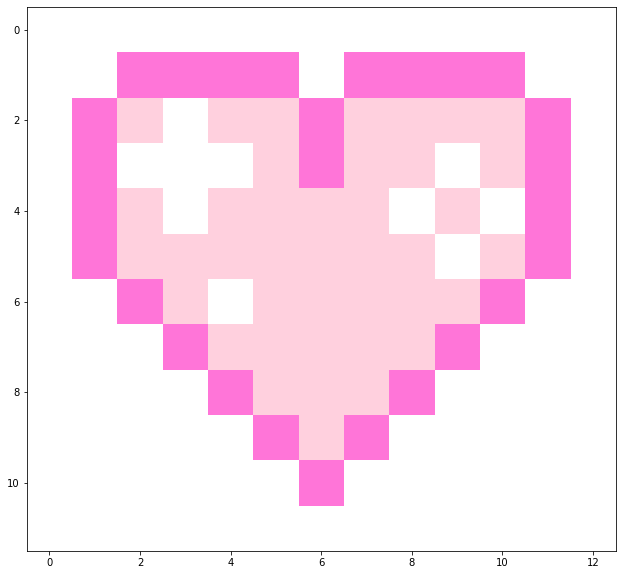

(50, 50)
(50, 50, 4)
0007388.gif ['spin', 'emote', 'animation', 'colors', 'spinning', 'chat', 'party', 'glowing', 'rave', 'partying', 'dancing', 'lights', 'celebrate', 'icon', 'revenge', 'sith', 'twist', 'happy', 'obi wan', 'holiday', 'birthday', 'glow', 'hard', 'obi', 'lightsaber', 'star', 'color', 'celebration', 'flashing', 'revolution', 'wan', 'wars', 'dance', 'ben', 'flash', 'sticks']


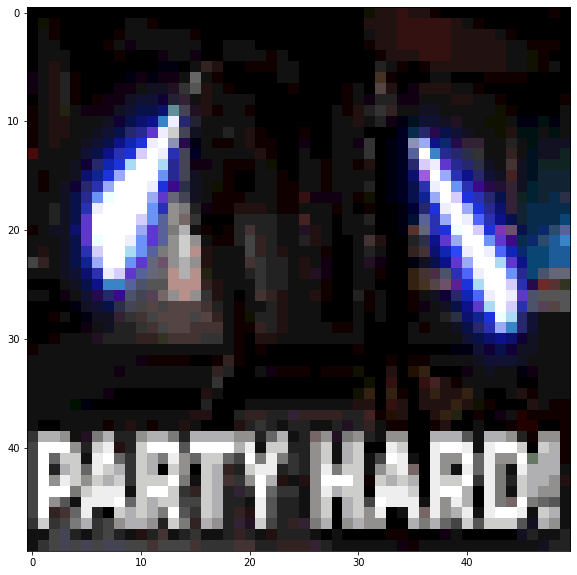

(51, 100)
(100, 51, 4)
0006581.gif ['pixel', 'lantern', 'pixel art']


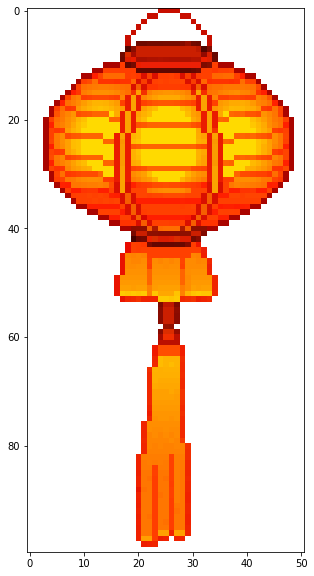

(25, 20)
(20, 25, 4)
0014487.gif ['game night']


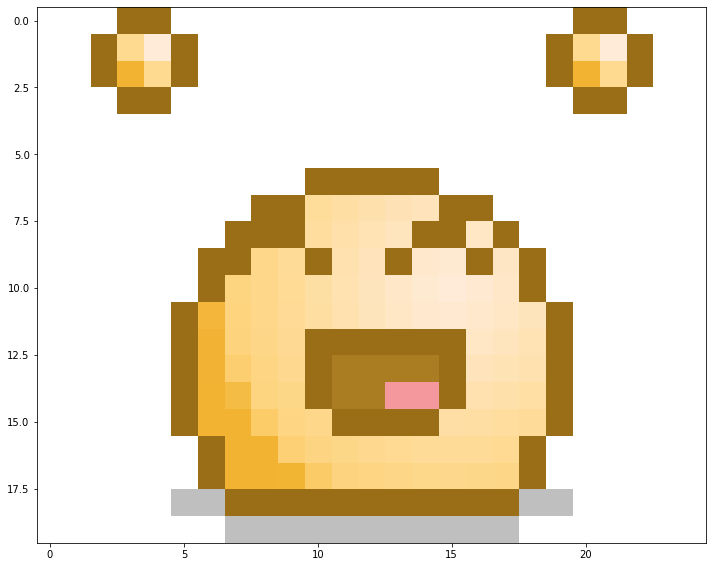

(309, 251)
(251, 309, 4)
0002288.gif ['page doll', 'pixel art', 'semi open species']


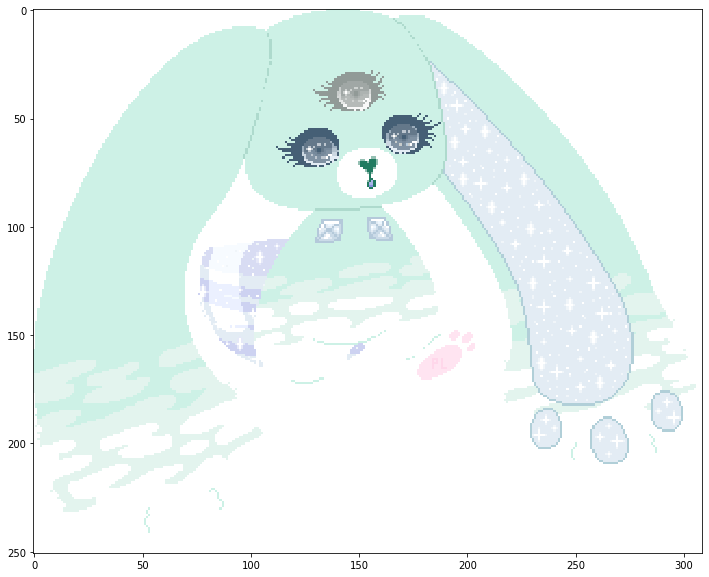

(800, 600)
(600, 800, 4)
0013096.gif ['blend', 'sunset colour']


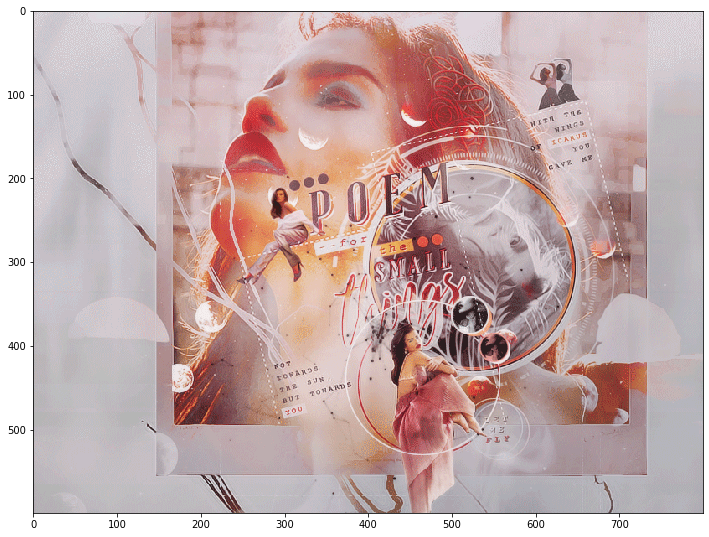

(59, 104)
(104, 59, 4)
0006343.gif ['daisy', 'pixel art', 'pixel animation', 'character design', 'flowers']


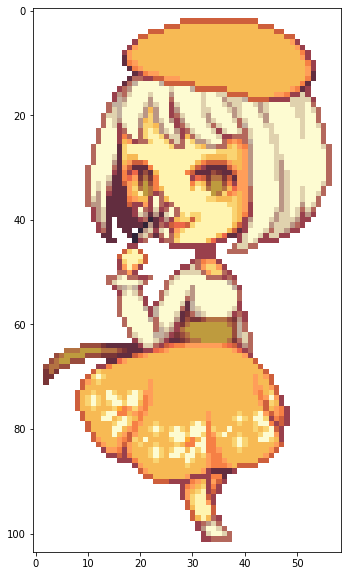

(50, 50)
(50, 50, 4)
0013490.gif ['bangtan']


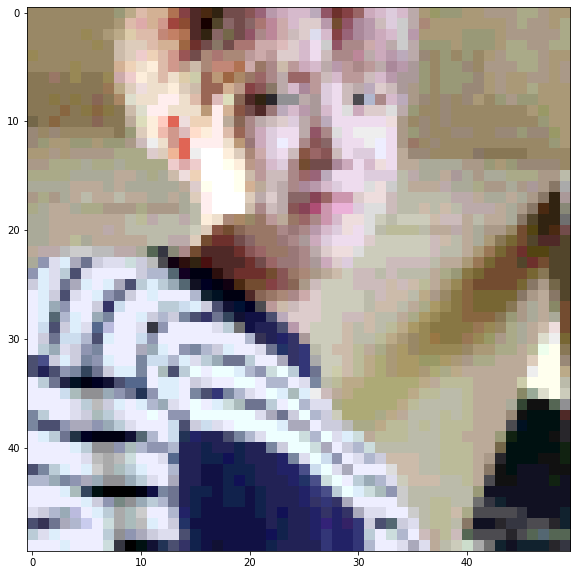

(95, 24)
(24, 95, 4)
0006845.gif ['pastel', 'sweets', 'pixel', 'pixel art', 'hearts', 'cute', 'pixels', 'soda', 'drink', 'candy', 'lemonade', 'kawaii']


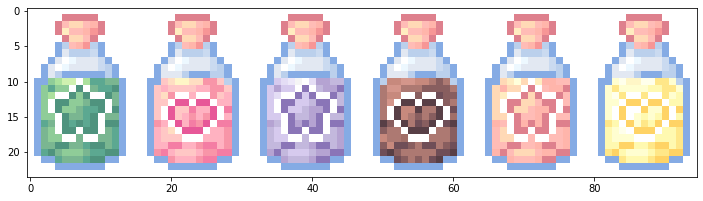

(99, 56)
(56, 99, 4)
0000657.gif ['stamp', 'gender equality', 'feminism', 'politics', 'gender rights']


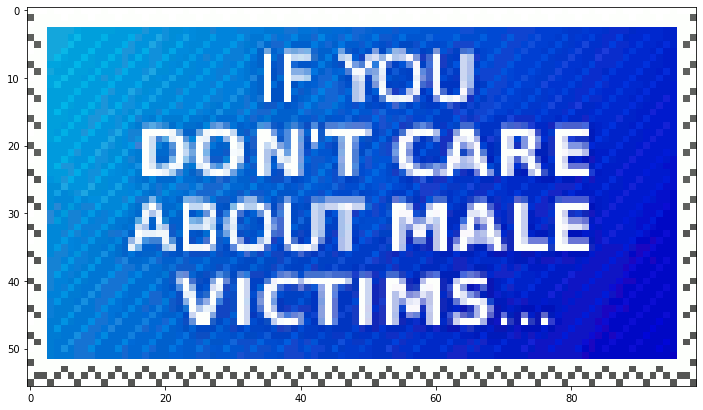

(62, 65)
(65, 62, 4)
0002219.gif ['halloween', 'pastel', 'cat', 'kitty', 'pink', 'kitten', 'art', 'pixel art', 'cute', 'witch', 'pixel', 'kawaii']


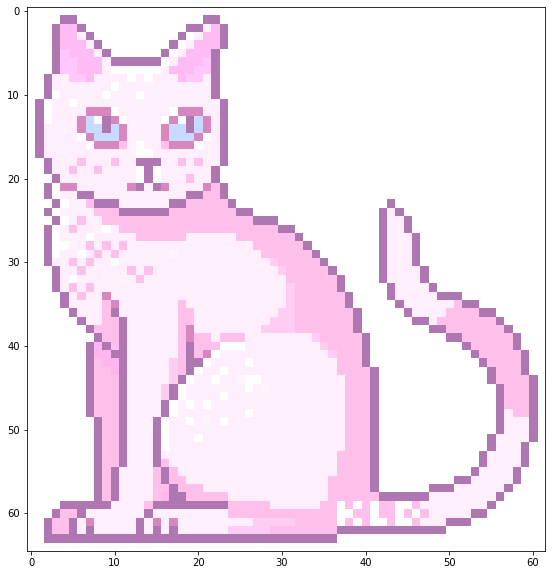

(50, 50)
(50, 50, 4)
0014942.gif []


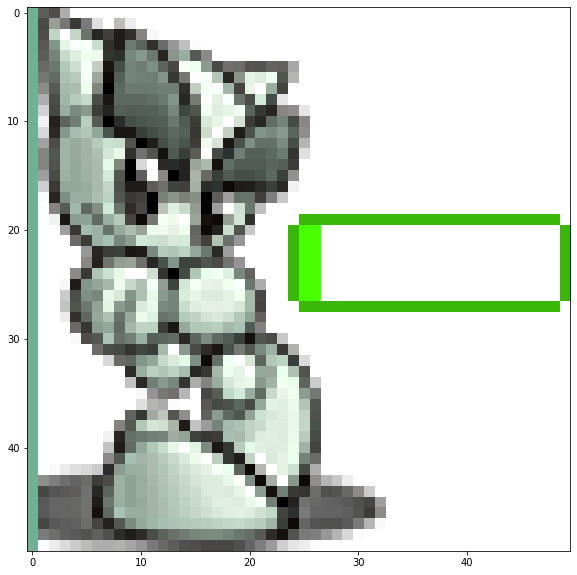

(15, 15)
(15, 15, 4)
0004846.gif ['glared', 'starry', 'eyes', 'begging', 'beg', 'amazed', 'cute', 'star star']


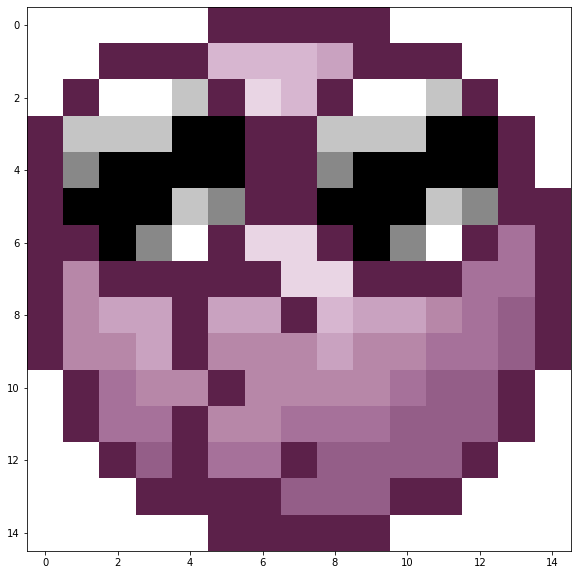

(50, 50)
(50, 50, 4)
0007545.gif []


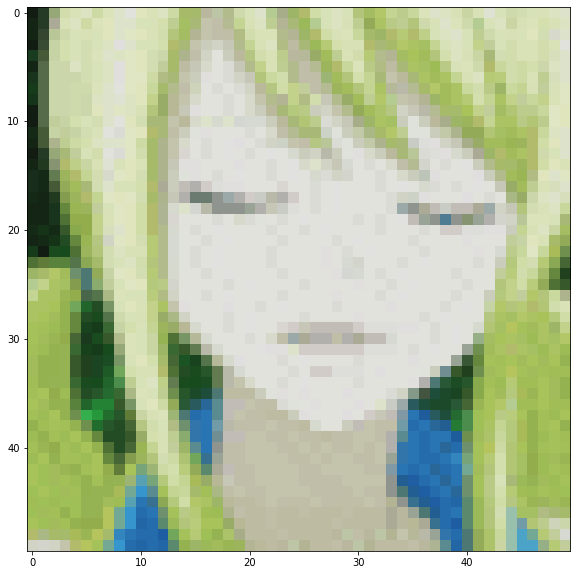

(99, 56)
(56, 99, 4)
0000612.gif ['mexican', 'blithe ring idiot', 'donald', 'social security', 'government', 'idiot', 'muslim', 'welfare', 'trump', 'stupid', 'loving', 'anti trump', 'vote', 'voters', 'illegal', 'off', 'donald trump', 'living off the government', 'food stamps', 'anti', 'moron']


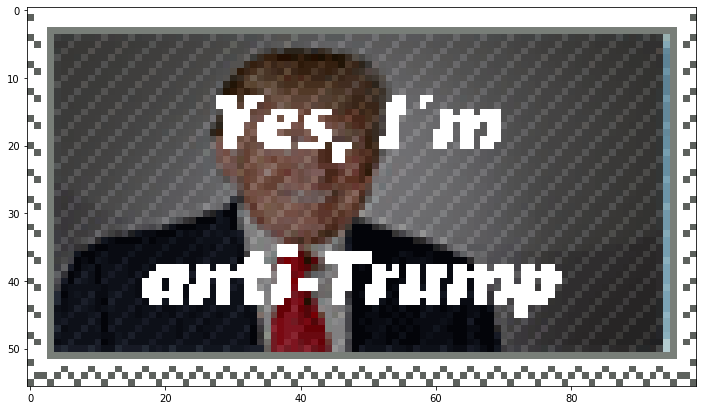

(157, 196)
(196, 157, 4)
0006345.gif ['pixel chibi', 'cute adorable', 'pixel art', 'commission art', 'commission', 'pixel commission', 'pixel']


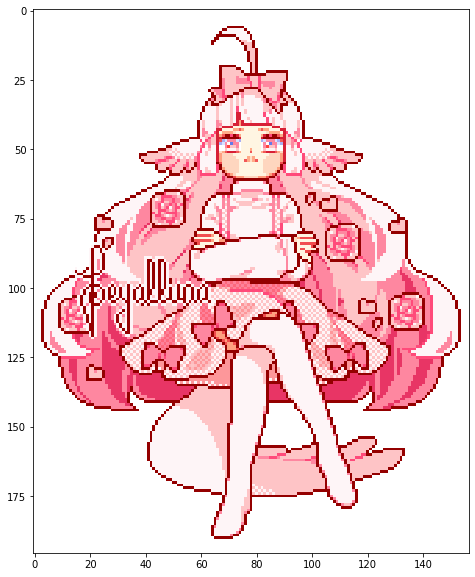

(148, 33)
(33, 148, 4)
0002201.gif ['halloween', 'tombstone', 'art', 'pixel art', 'gravestone', 'creepy', 'grave', 'headstone', 'spirits', 'spooky', 'pixel', 'ghosts', 'cemetery', 'graveyard']


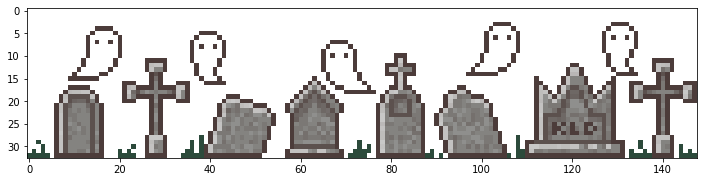

(9, 9)
(9, 9, 4)
0006535.gif ['bullet', 'sparkle', 'cute', 'gif']


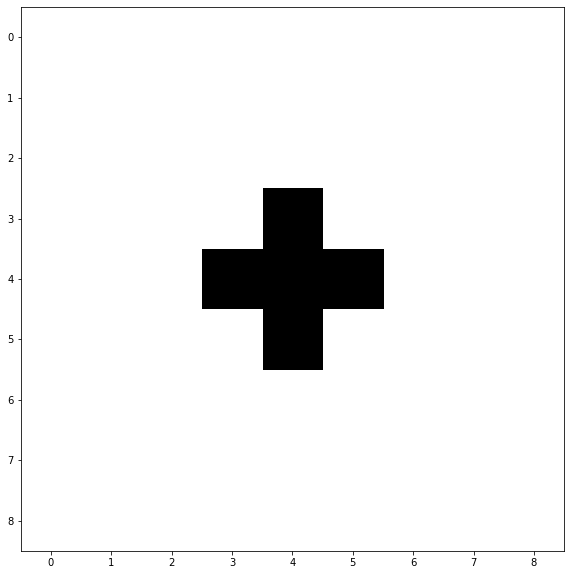

(99, 56)
(56, 99, 4)
0013571.gif ['rain', 'stamp']


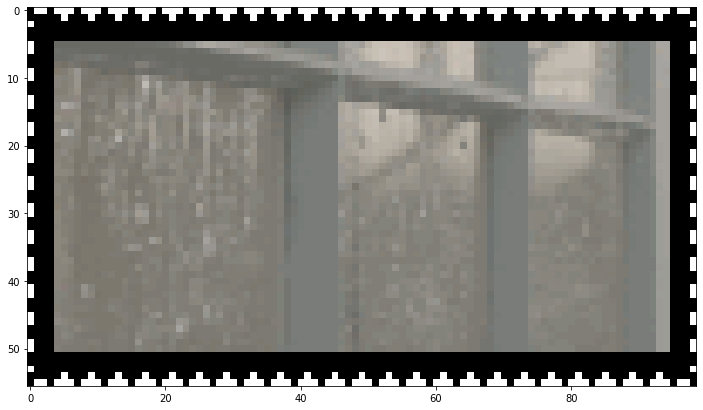

(732, 750)
(750, 732, 4)
0006407.gif ['jack septic eye', 'halloween', 'antiseptic eye']


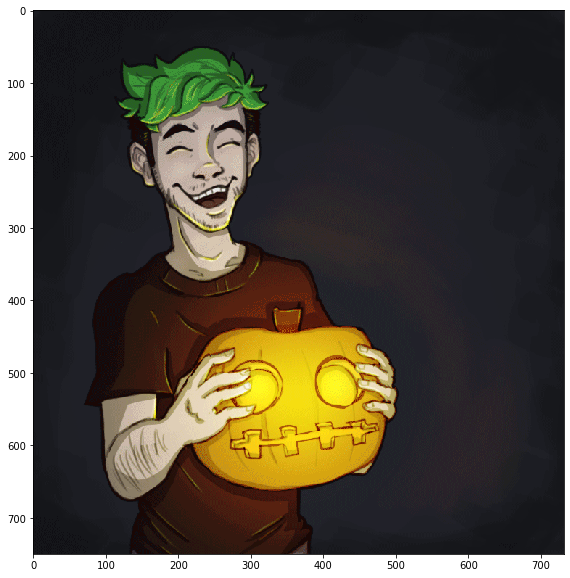

(34, 34)
(34, 34, 4)
0002179.gif ['free to use', 'halloween', 'page', 'divider', 'aesthetic', 'emote', 'page decoration', 'emotion', 'emoji', 'creepy', 'customization', 'decoration', 'spooky', 'pumpkin', 'pumpkins']


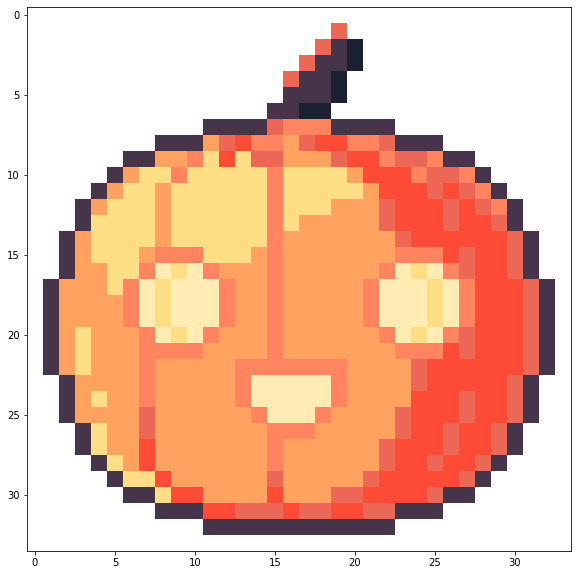

(99, 56)
(56, 99, 4)
0000422.gif ['debate', 'opinion', 'stamp']


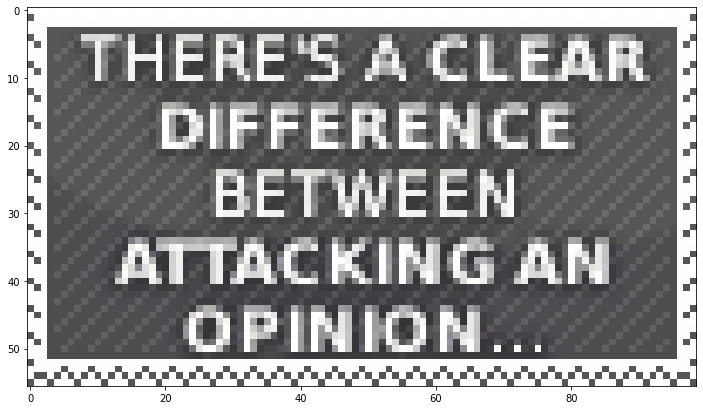

(81, 25)
(25, 81, 4)
0006883.gif ['vintage', 'pixel art', 'guro', 'medical', 'gore', 'arrow', 'shot', 'old fashioned', 'pixel', 'pastel', 'art', 'medicine', 'pink', 'menhera', 'syringe', 'needle', 'creepy', 'pastel goth', 'decoration']


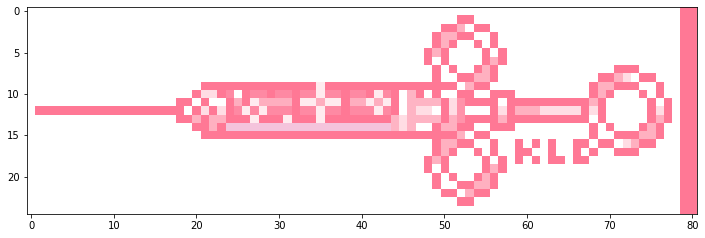

(50, 50)
(50, 50, 4)
0013489.gif ['goofy smile', 'bangtan', 'smile', 'bangtan boys']


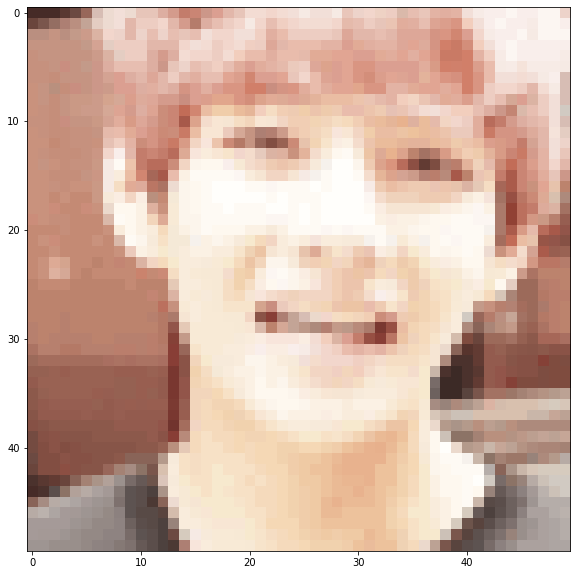

(50, 50)
(50, 50, 4)
0013506.gif ['cute', 'lollipop', 'free avatar', 'kawaii']


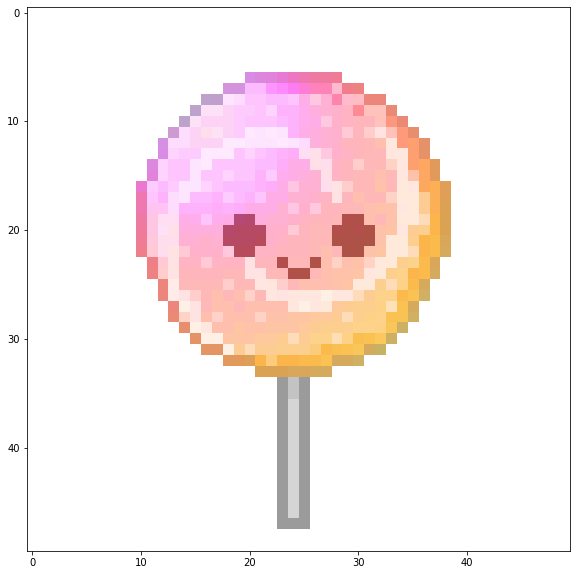

(50, 50)
(50, 50, 4)
0007716.gif ['wakfu', 'love', 'emotion', 'cute', 'white dove hemlock', 'boy', 'eliatrope', 'kiss']


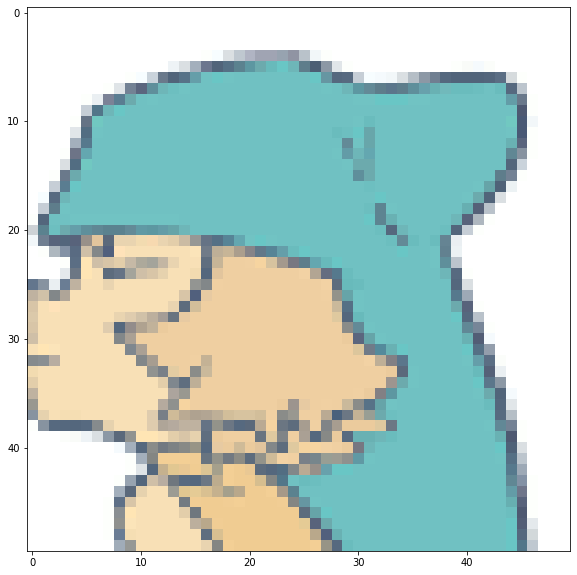

(100, 56)
(56, 100, 4)
0013568.gif ['vintage', 'herbs', 'shadows', 'plants', 'petals', 'witch', 'witchcraft', 'flower', 'indie', 'paganism', 'pastel', 'anime', 'pagan', 'herb', 'book', 'flowers', 'plant', 'nature', 'witches', 'natural', 'pastels']


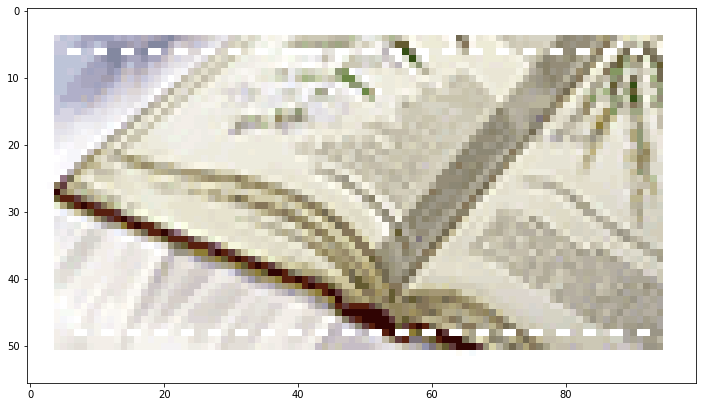

(50, 50)
(50, 50, 4)
0008382.gif ['animated', 'spring trap', 'golden freddy', 'spring bonnie', 'golden bonnie', 'emoticon']


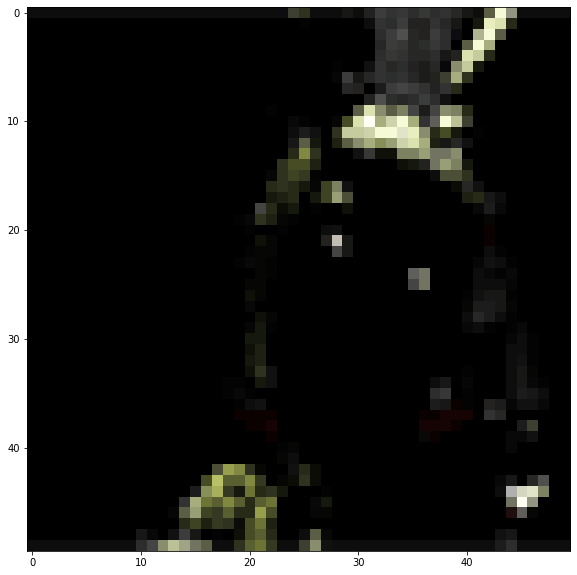

(34, 32)
(32, 34, 4)
0002196.gif ['halloween', 'page', 'divider', 'aesthetic', 'pumpkins', 'art', 'pixel art', 'creepy', 'customization', 'autumn', 'decoration', 'spooky', 'pumpkin', 'pixel']


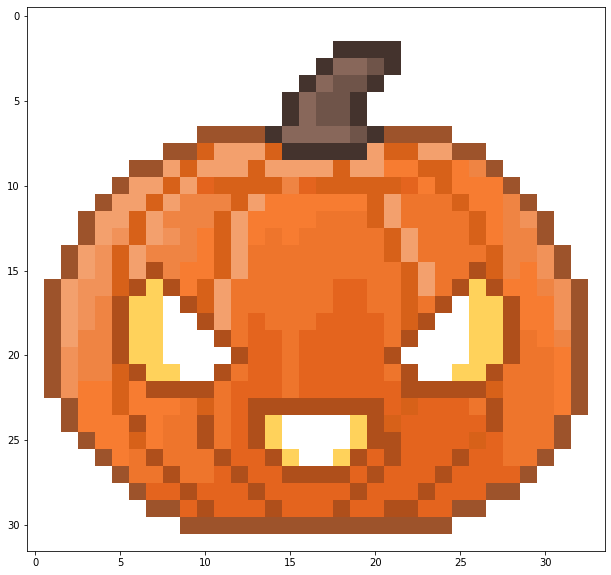

(150, 46)
(46, 150, 4)
0006569.gif ['bubbles', 'pastel', 'seashell', 'sea punk', 'sparkly', 'nautical', 'mermaid', 'pixel art', 'reef', 'sea', 'art', 'shell', 'coral', 'bubble', 'decoration', 'pixel', 'ocean']


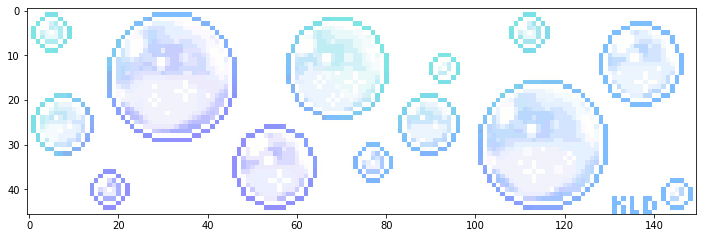

(50, 50)
(50, 50, 4)
0007038.gif ['angry chara', 'chara under tale', 'scream', 'emote', 'annoyed', 'angry birds', 'emoticon', 'chara', 'undertale']


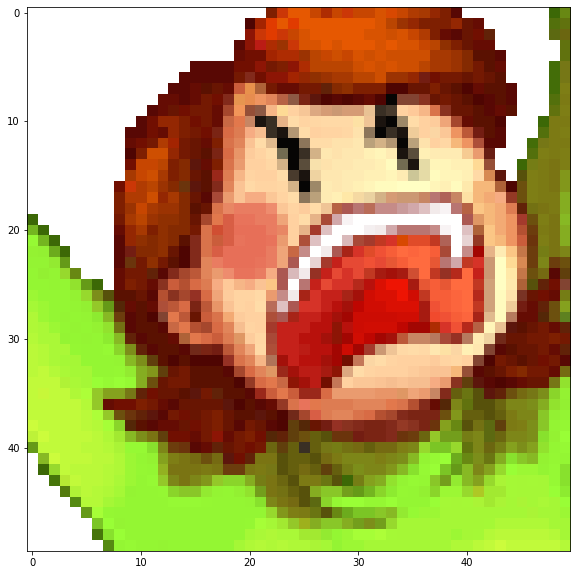

(50, 50)
(50, 50, 4)
0004228.gif ['going away', 'continuous', 'tired', 'dummy', 'sliding', 'approaching', 'mad dummy under tale', 'mad dummy', 'go', 'dummy under tale', 'undertale']


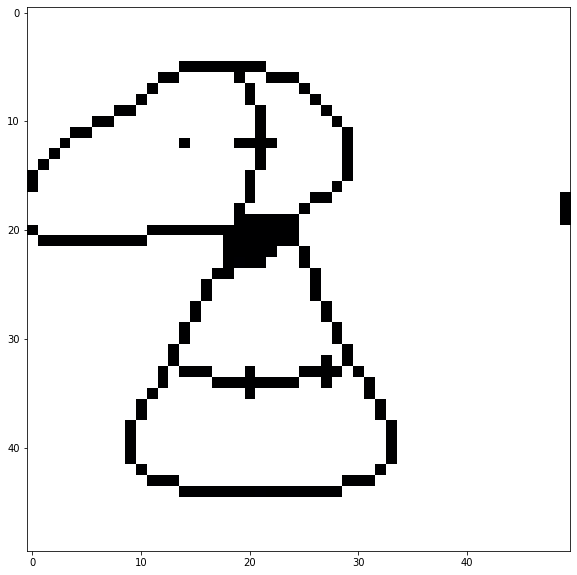

(50, 50)
(50, 50, 4)
0010451.gif ['welcome', 'adorable', 'happy birthday', 'animation', 'watch', 'woo', 'gold chica', 'hi', 'workout', 'gif', 'cute adorable', 'celebrating', 'rock on', 'thank you', 'thanks', 'source filmmaker', 'yeah', 'dancing', 'celebrate', "five nights at freddy's", 'happy', 'adorable cute', 'thank', 'friend', 'rock', 'birthday', 'you', 'anime', 'chica', 'favorite', 'foxy', 'bonnie', 'celebration', 'hello', 'photoshop', 'wiggle', 'fave', 'freddy', 'dance', 'pizza', 'kawaii']


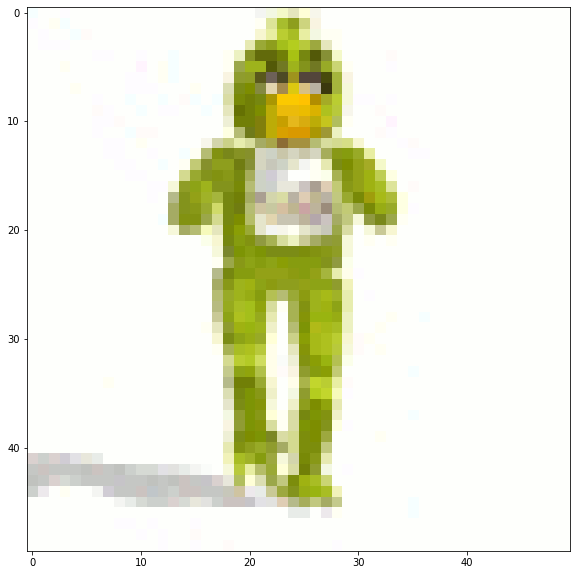

(50, 50)
(50, 50, 4)
0014925.gif ['nuts', 'twilight sparkle', 'gif', 'pony', 'crazy', 'sparkle', 'my little pony', 'twilight']


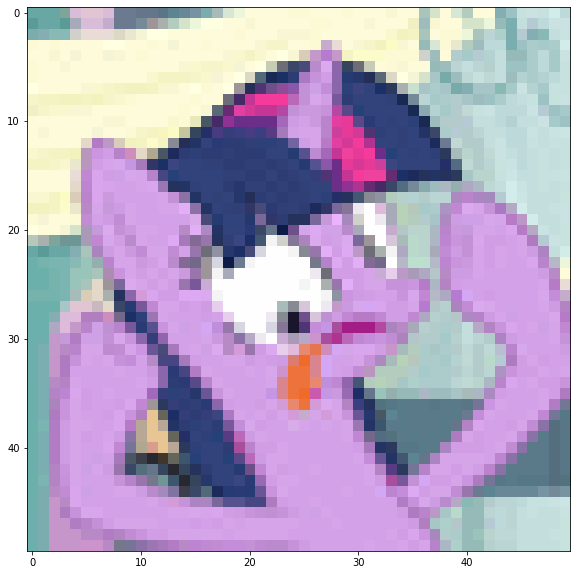

(50, 50)
(50, 50, 4)
0014943.gif []


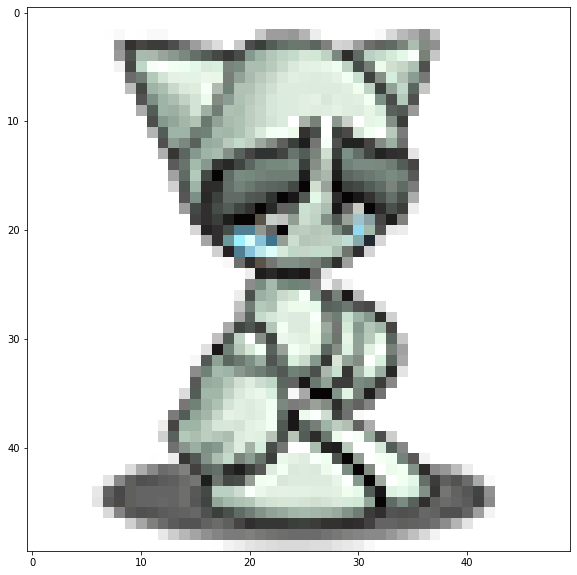

(119, 20)
(20, 119, 4)
0006590.gif ['pride flag', 'pixel art', 'galaxy', 'gay', 'pride month', 'bisexual', 'lgbt', 'pretty', 'cute', 'lesbian', 'pixel', 'love', 'pastel', 'aesthetic', 'art', 'shooting star', 'star', 'comet', 'page', 'space', 'divider', 'transgender', 'pastel goth', 'shooting', 'decoration', 'kawaii']


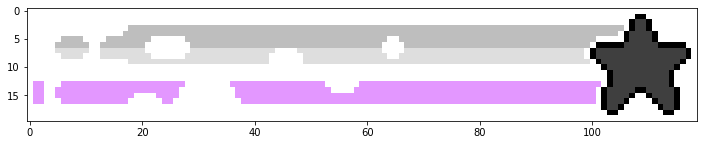

(50, 50)
(50, 50, 4)
0008358.gif ['golden', 'icon', "five nights at freddy's", 'gif', 'shadow', 'freddy', 'animation', 'spring trap', 'foxy', 'avatar', 'free', 'five nights at freddy', 'gold chica', 'chica', 'golden bonnie', 'bonnie']


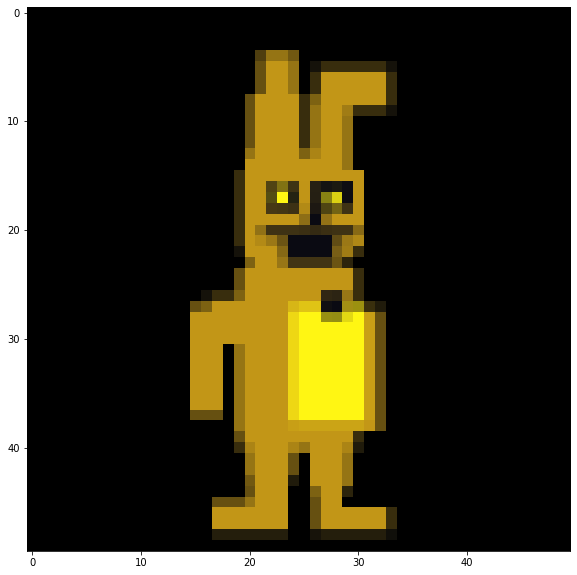

(50, 50)
(50, 50, 4)
0008356.gif ['golden', 'guy', 'animation', 'purple guy', 'avatar', 'gold chica', 'vincent', 'gif', 'purple', 'spring trap', 'icon', "five nights at freddy's", 'shadow', 'free', 'five nights at freddy', 'chica', 'foxy', 'bonnie', 'freddy']


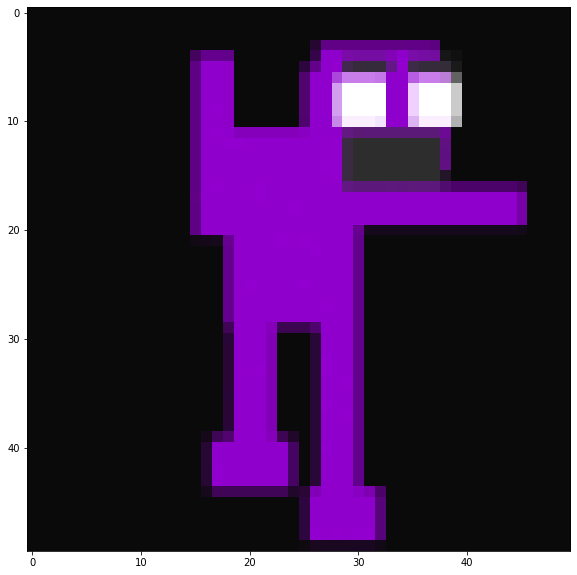

(99, 56)
(56, 99, 4)
0000471.gif ['child abuse', 'stamp']


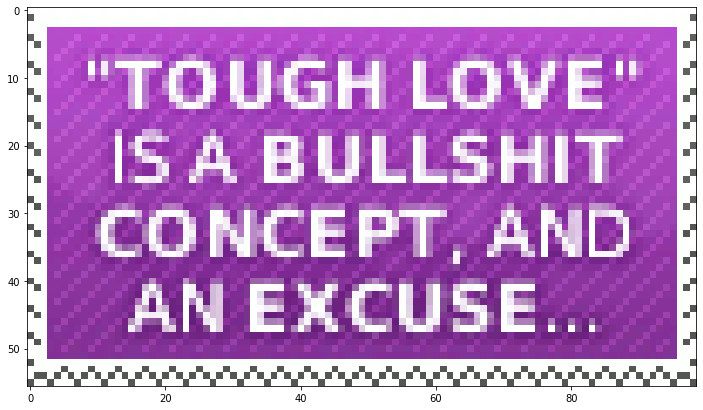

(50, 50)
(50, 50, 4)
0007381.gif ['icon', 'f2u', 'sans', 'undertale']


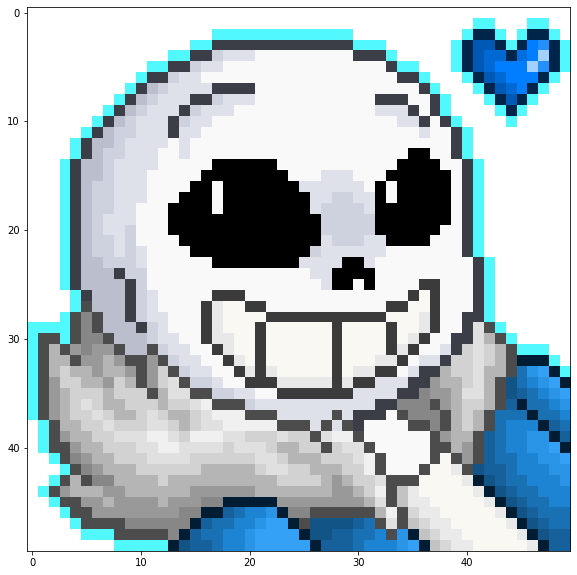

(50, 50)
(50, 50, 4)
0007714.gif ['wakfu', 'angry happy', 'smile', 'happy', 'excitement', 'shift', 'bitch face', 'blush', 'serious', 'switch', 'excited']


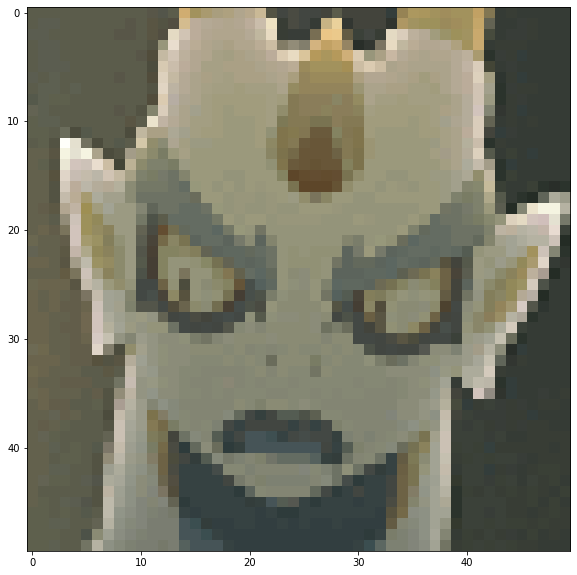

(99, 56)
(56, 99, 4)
0006914.gif ['hannibal', 'stamp']


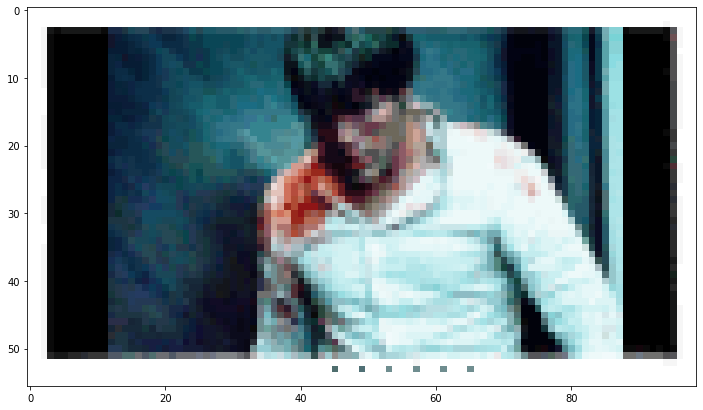

(89, 59)
(59, 89, 4)
0006529.gif ['lgbt support', 'ftu', 'lgbt', 'page decoration', 'decorations', 'page deco', 'lgbtq', 'lgbt community', 'f2u', 'free to use', 'lgbtqia', 'decorative', 'page decorations', 'free', 'decor', 'lgbt pride', 'deco', 'pride', 'page decor', 'decoration']


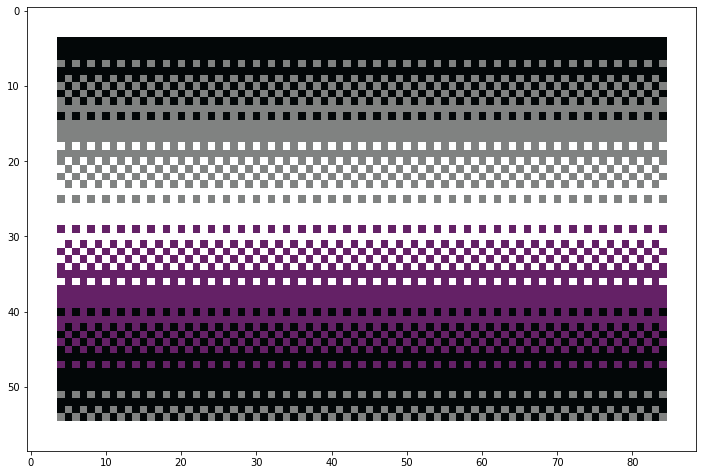

(15, 15)
(15, 15, 4)
0014508.gif ['emote', 'joy', 'emoticon', 'happy']


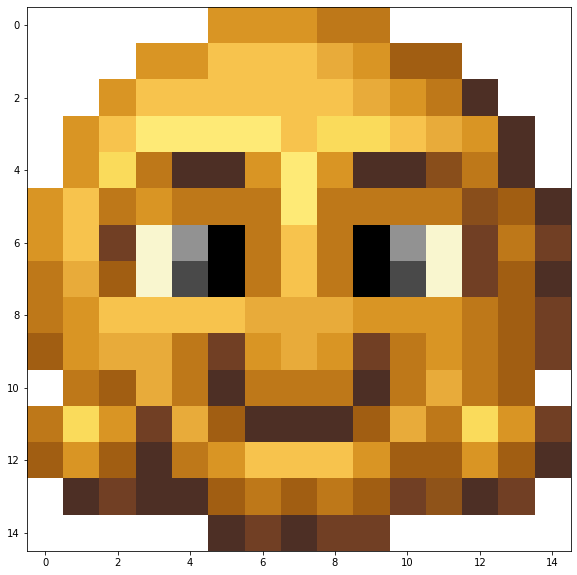

(99, 56)
(56, 99, 4)
0006935.gif ['f2u', 'retro', 'stamp', 'pink', 'aesthetic', 'gif', 'purple', 'vaporwave', 'glitch', 'free', 'tumblr']


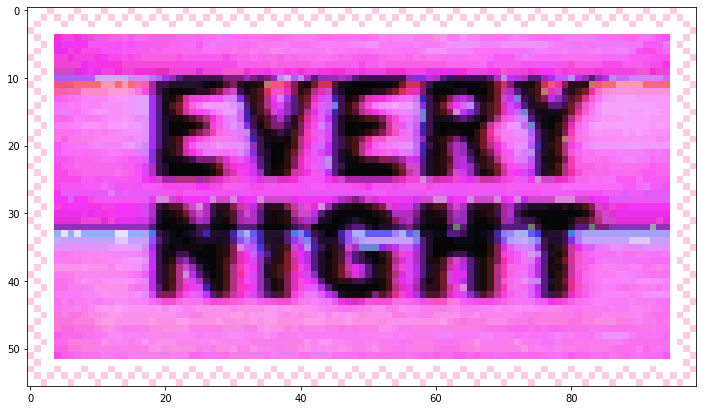

(117, 31)
(31, 117, 4)
0006808.gif ['vintage', 'pixel art', 'guro', 'medical', 'gore', 'arrow', 'shot', 'old fashioned', 'pixel', 'pastel', 'art', 'medicine', 'pink', 'menhera', 'syringe', 'needle', 'creepy', 'pastel goth', 'decoration']


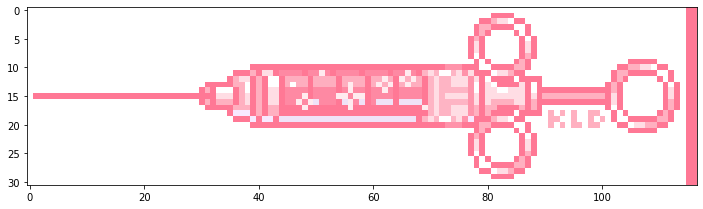

(1200, 900)
(900, 1200, 4)
0003412.gif ['tyrannosaurus', 'theropod', 'tyrannosauridae', 'paleontology', 'tyrannosaur', 'palaeontology', 'cretaceous', 'paleo', 'tyrannosaurus rex', 'tyrannosaurid', 'paleo art', 'rex', 'dinosaur']


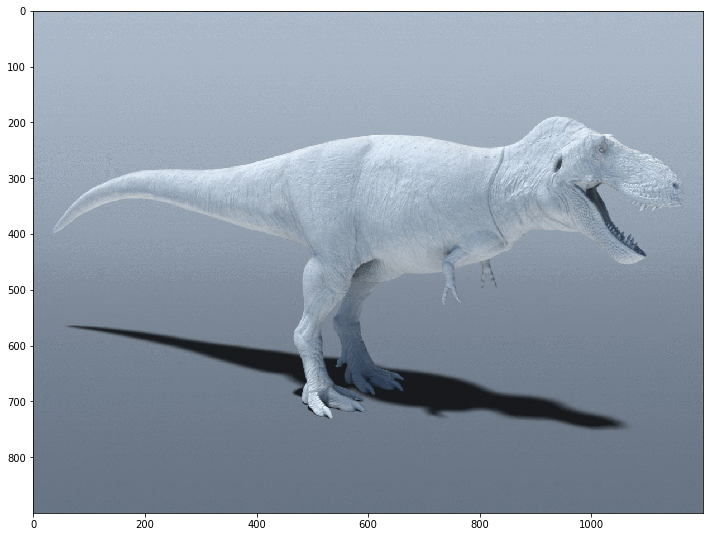

(50, 50)
(50, 50, 4)
0008200.gif ['gone', 'out', 'thanos', 'avengers', 'wipe', 'snap', 'half', 'infinity war', 'marvel', 'gauntlet', 'war', 'glove', 'villain', 'population', 'wars', 'stones', 'infinity gauntlet', 'one', 'infinity']


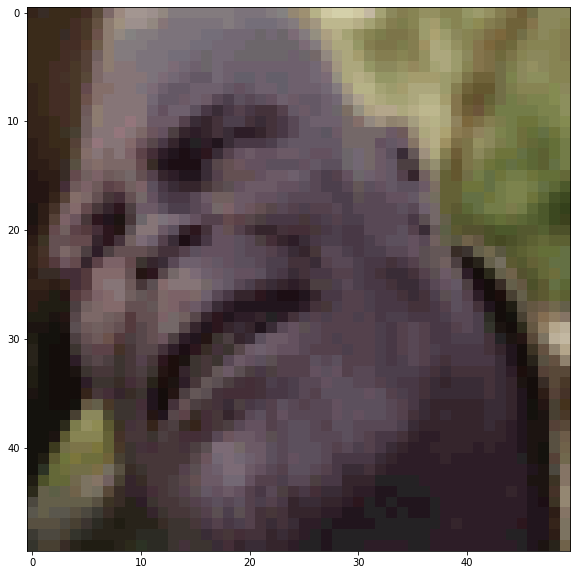

(50, 50)
(50, 50, 4)
0007383.gif ['spam', 'sans', 'gif', 'kinky', 'tale', 'top', 'papyrus', 'animation', 'dab', 'bubbles cat', 'dance', 'skeletons', 'dance tale', 'undertale']


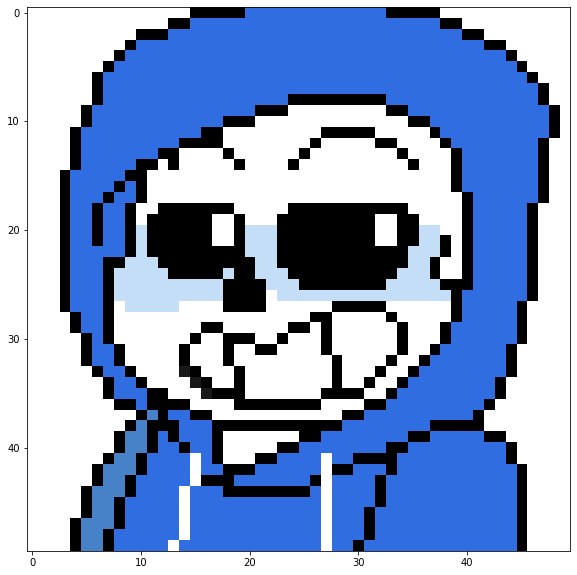

(99, 56)
(56, 99, 4)
0000592.gif ['younger cousin', 'child', 'children', 'younger', 'older', 'older cousin', 'babysitter', 'free', 'cousin']


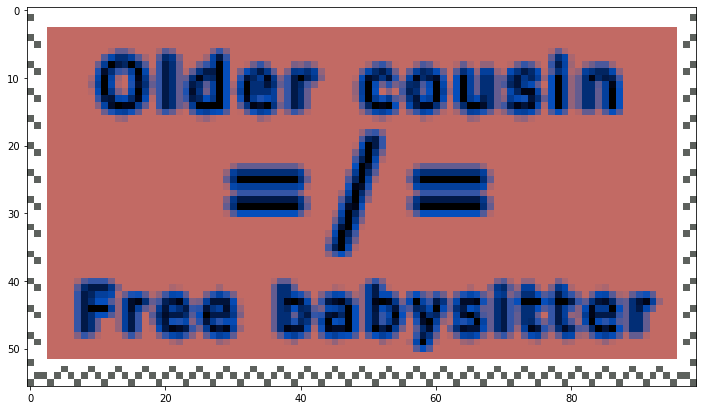

(50, 50)
(50, 50, 4)
0008365.gif ['vincent purple guy', 'animated', 'emoticon']


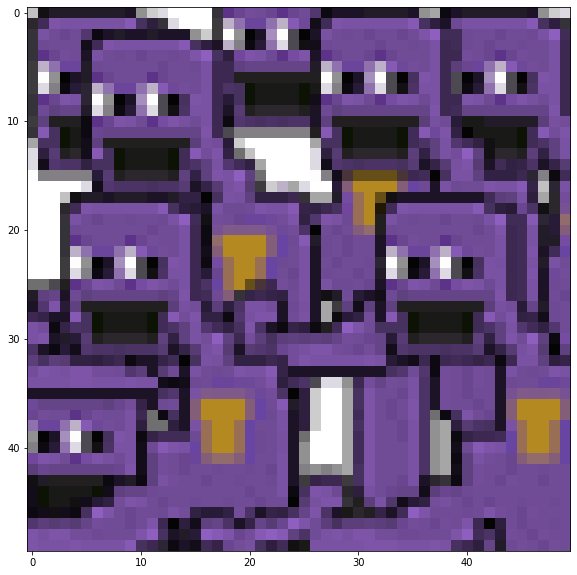

(99, 56)
(56, 99, 4)
0005832.gif ['kinky fetish', 'stamps', 'kink', 'kink shaming', 'fetish']


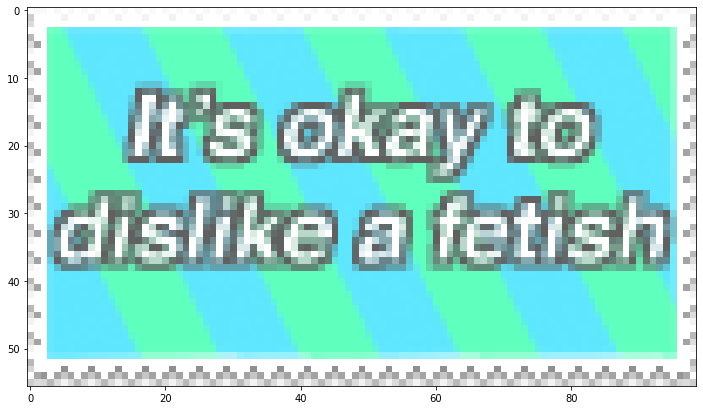

(99, 56)
(56, 99, 4)
0013574.gif ['stamp', 'gif', 'canadian', 'trees forest', 'black and white', 'forest']


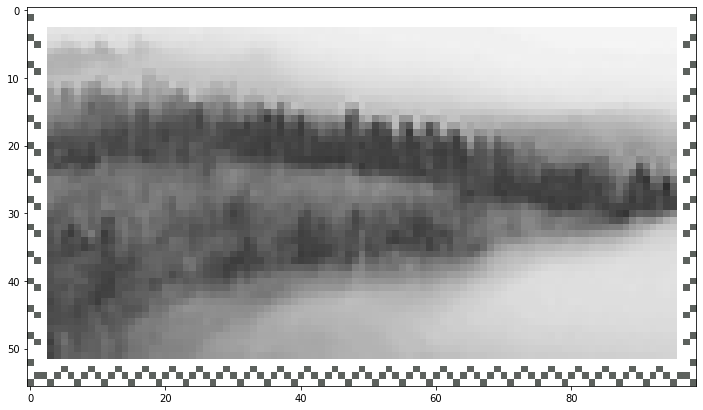

(100, 157)
(157, 100, 4)
0002152.gif ['gore', 'f2u', 'halloween', 'page', 'horror', 'candle', 'guro', 'black', 'creepy', 'customization', 'candelabra', 'decoration', 'deco', 'goth']


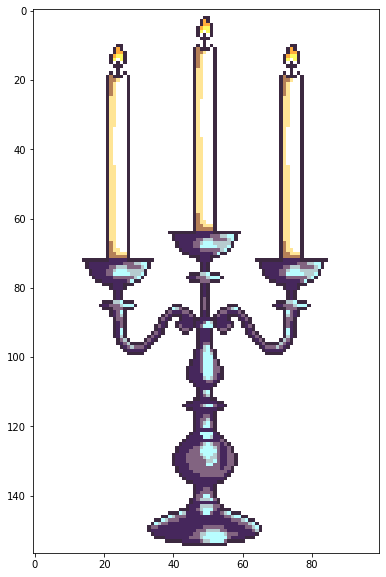

(50, 50)
(50, 50, 4)
0014929.gif ['season my little pony', 'my little pony friendship is magic', 'rarity']


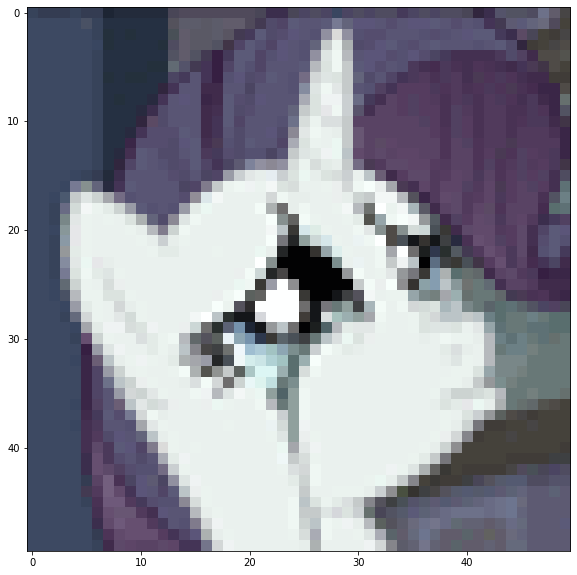

(18, 18)
(18, 18, 4)
0006787.gif ['violet', 'orb', 'purple', 'ultraviolet', 'sphere', 'bullet']


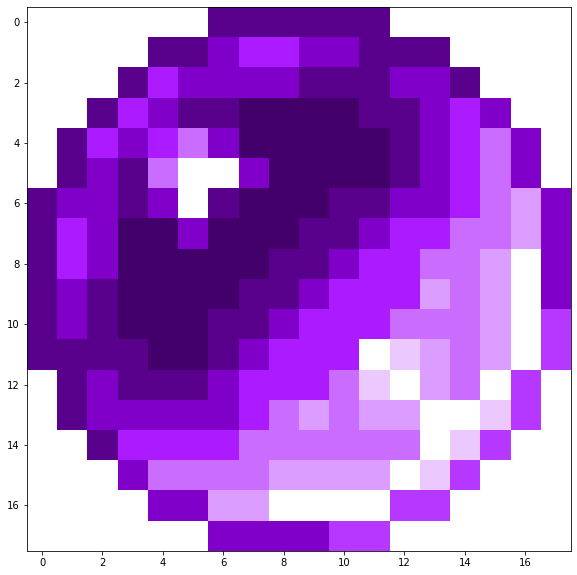

(113, 20)
(20, 113, 4)
0006844.gif ['food', 'strawberry', 'f2u', 'apple', 'divider', 'berry', 'orange', 'pixel art', 'cute', 'pixels', 'banana', 'plum', 'decoration', 'pear', 'fruit', 'pixel', 'kawaii']


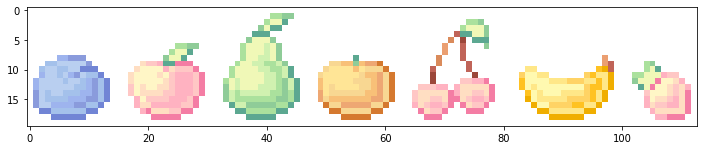

(48, 48)
(48, 48, 4)
0013503.gif ['k-pop', 'adorable', 'smile', 'lovely', 'mesmerizing', 'enchanting', 'emoji', 'cute', 'korea', 'korean', 'emoticon', 'love']


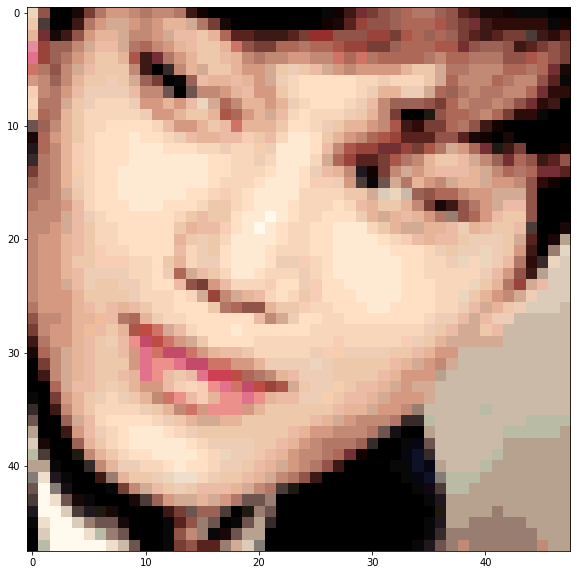

(110, 27)
(27, 110, 4)
0006873.gif ['red', 'ruby', 'gem', 'divider', 'floating', 'pixel']


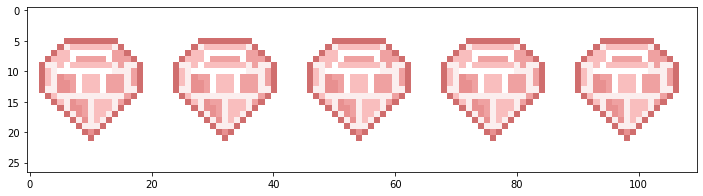

(99, 56)
(56, 99, 4)
0005844.gif ['stamp', 'politics', 'alt right', 'pol', 'left-wing', 'right-wing']


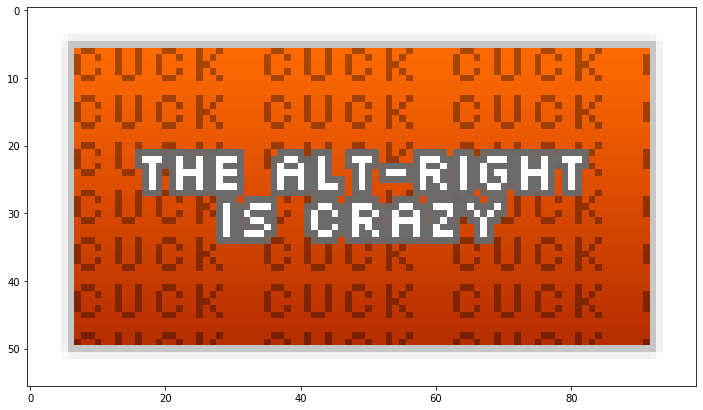

(50, 50)
(50, 50, 4)
0004634.gif ['jack septic eye', 'hashtag']


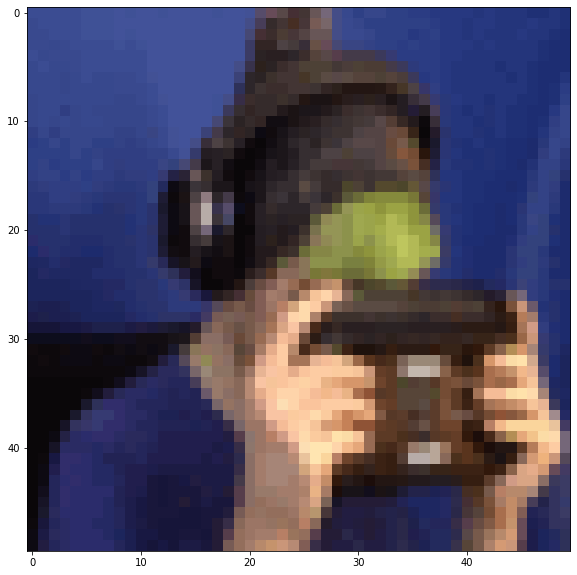

(800, 676)
(676, 800, 4)
0012342.gif ['cat', 'pink', 'princess', 'bunny', 'auction', 'neko', 'closed species', 'kawaii']


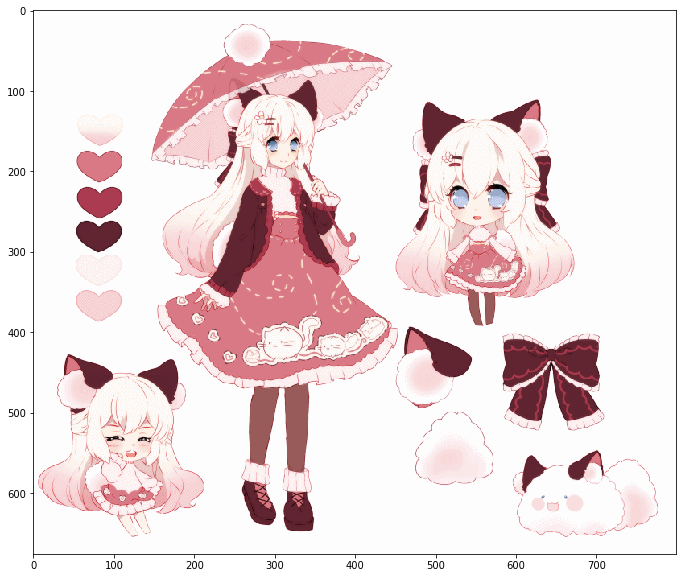

(50, 50)
(50, 50, 4)
0004227.gif ['pixel animation', 'chat icon', 'undertale']


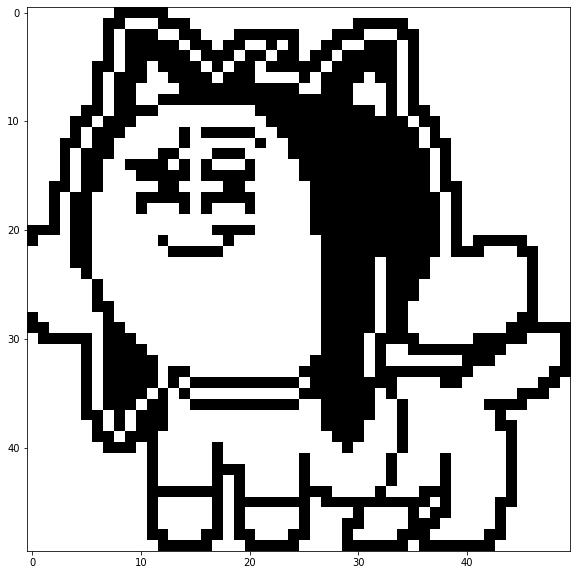

(50, 50)
(50, 50, 4)
0014950.gif ['rage', 'info wars', 'alex', 'gimp', 'jones', 'emoticon', 'alex jones']


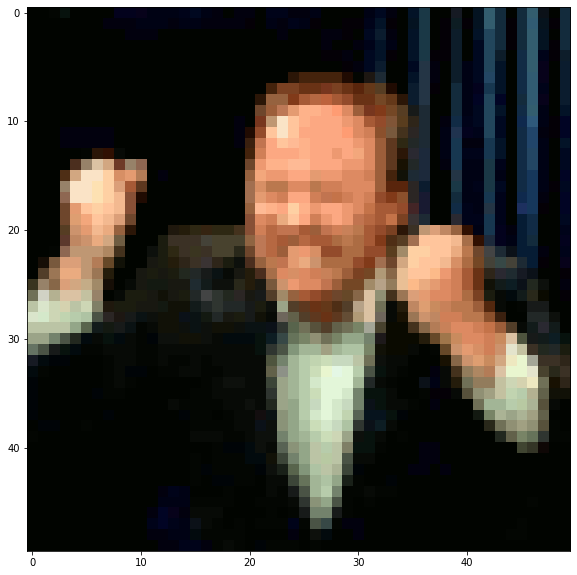

(600, 698)
(698, 600, 4)
0007066.gif ['page doll', 'frisk under tale', 'gif animation']


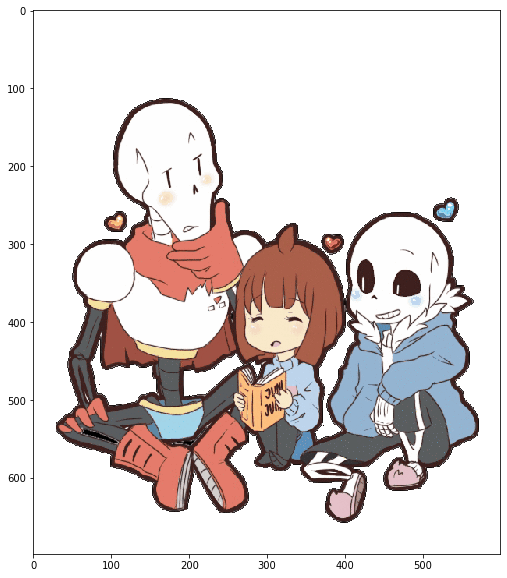

(50, 50)
(50, 50, 4)
0013507.gif ['free avatar', 'rainbow', 'cute', 'cake', 'kawaii']


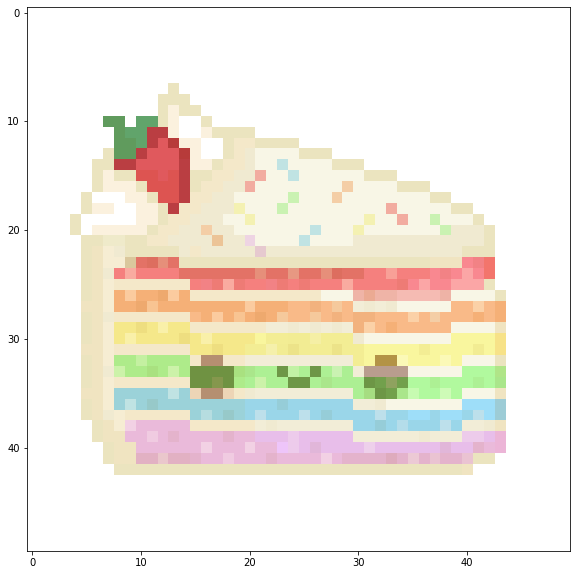

(48, 86)
(86, 48, 4)
0002242.gif ['pastel', 'aesthetic', 'cards', 'tarot', 'reading', 'witch', 'the pope', 'pagan', 'divination']


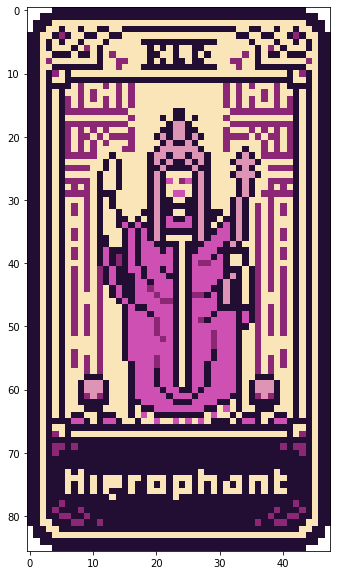

(32, 32)
(32, 32, 4)
0002165.gif ['bullet', 'f2u', 'eye', 'black and white']


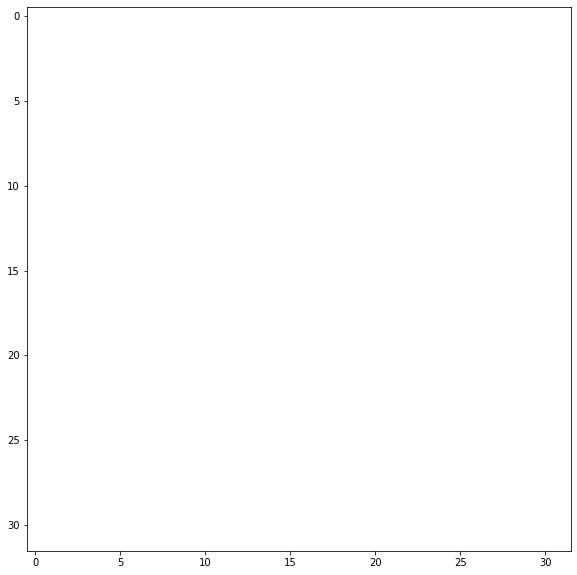

(31, 15)
(15, 31, 4)
0014514.gif ['love', 'emote', 'blow', 'heart', 'emoticon', 'kiss']


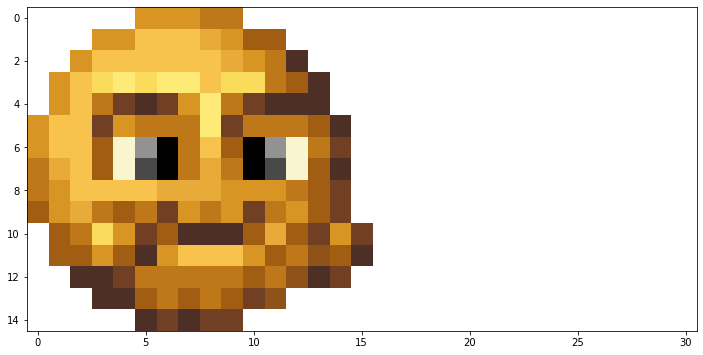

(99, 56)
(56, 99, 4)
0006925.gif ['neon', 'stamp', 'gif', 'aesthetic', 'blue', 'animated', 'purple', 'soft grunge', 'cute', 'grunge', 'tumblr']


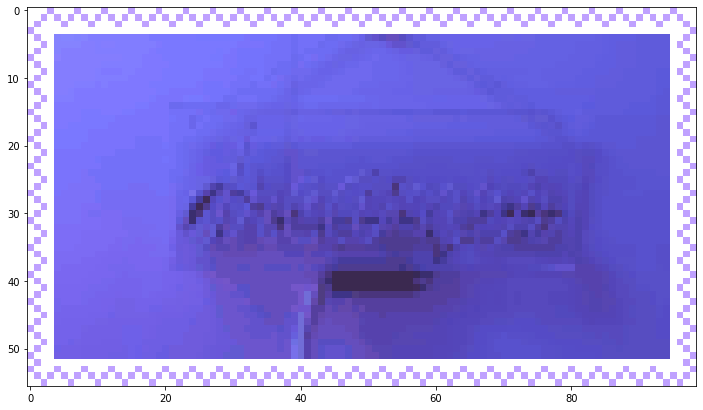

(50, 50)
(50, 50, 4)
0008354.gif ['five', 'icon', 'use', 'chat', 'animated', 'freddy', 'friendly', 'kana', 'drifter', 'free', 'nights', 'nightmare', 'bonnie']


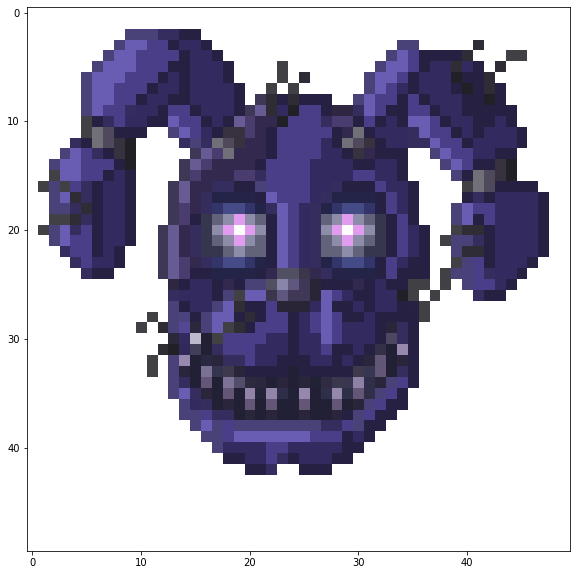

(139, 15)
(15, 139, 4)
0005354.gif ['divider', 'brown', 'nautical', 'pixel art', 'ropes', 'stars', 'anchor', 'pixel']


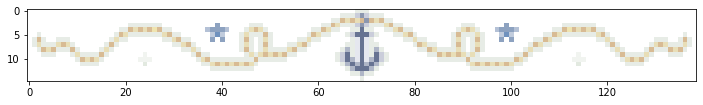

(50, 50)
(50, 50, 4)
0014936.gif []


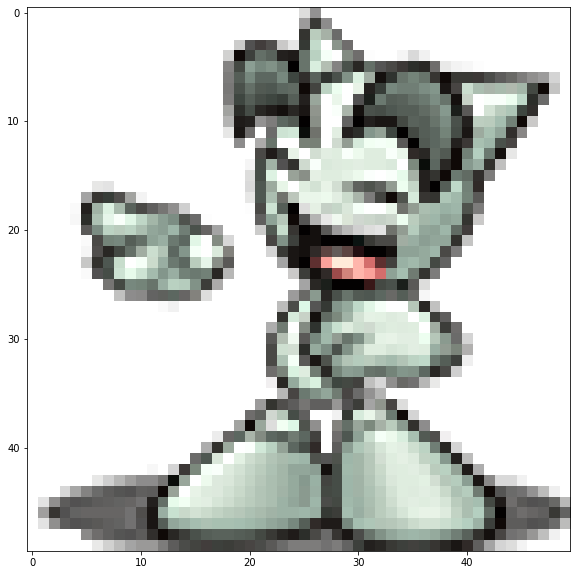

(18, 18)
(18, 18, 4)
0006776.gif ['bullet', 'orb', 'sphere', 'red']


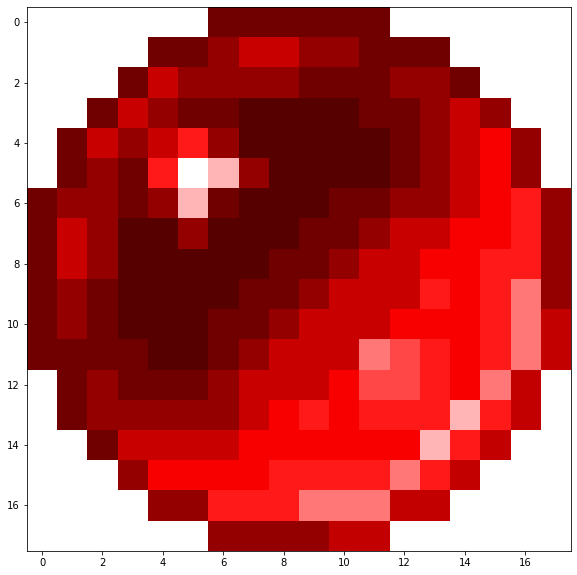

(1200, 686)
(686, 1200, 4)
0005395.gif ['papyrus', 'sans', 'undertale']


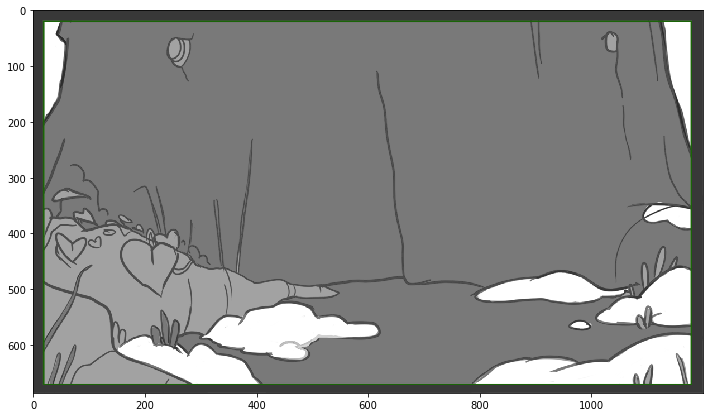

In [44]:
## See random samples
size = 1000
np.random.shuffle(image_files)
image_files_subset = image_files[:size]
for image_file in image_files_subset:
    if not image_file.endswith('.gif'):
        continue
    image_filename = os.path.basename(image_file)
    labels = labels_dict[image_filename]
    
    img_pil = Image.open(image_file).convert('RGBA')
    print(img_pil.size)
    img = np.array(img_pil)
    print(img.shape)
    
    print(image_filename, labels)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(img, cmap='gray')
    plt.show()

In [50]:
with open('./labels2.csv', 'w') as f:
    for filename, labels in labels_dict.items():
        if filename.endswith('.gif'):
            continue
        row_str = filename + ','
        for label in labels:
            row_str += label + ','
        row_str = row_str.strip().strip(',') + '\n'
        
        f.write(row_str)